In [2]:
!pip install pandas matplotlib seaborn openpyxl


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Replace 'your_file_path.xlsx' with the actual path to your Excel file
file_path = r'D:\Redwan_WMU Thesis\LC_Area_Statistics.xlsx'

# Read the Excel file from sheet 2
df = pd.read_excel(file_path, sheet_name=1)


In [6]:
# Display the first few rows of the dataset
print(df.head())

# Get summary statistics
print(df.describe())

# Check data types and missing values
print(df.info())


   Year  Waterbody  Vegetation  Developed, Low Intensity  \
0  2000    1890.72     2579.67                   6286.77   
1  2007    1825.56     2406.78                   6075.00   
2  2013    1794.87     2288.25                   5853.33   
3  2016    1749.78     2261.34                   5802.84   
4  2022    1719.63    22224.60                  56776.50   

   Developed, Medium Intensity  Developed, High Intensity  Barren Land  
0                     28724.04                   19730.52       711.54  
1                     28899.90                   20017.89       698.13  
2                     29024.46                   20316.96       645.39  
3                     29062.53                   20371.59       675.18  
4                    291226.50                  205261.20      6547.50  
              Year    Waterbody    Vegetation  Developed, Low Intensity  \
count     5.000000     5.000000      5.000000                  5.000000   
mean   2011.600000  1796.112000   6352.128000      

In [12]:
print(df)

   Year  Waterbody  Vegetation  Developed, Low Intensity  \
0  2000    1890.72     2579.67                   6286.77   
1  2007    1825.56     2406.78                   6075.00   
2  2013    1794.87     2288.25                   5853.33   
3  2016    1749.78     2261.34                   5802.84   
4  2022    1719.63    22224.60                  56776.50   

   Developed, Medium Intensity  Developed, High Intensity  Barren Land  
0                     28724.04                   19730.52       711.54  
1                     28899.90                   20017.89       698.13  
2                     29024.46                   20316.96       645.39  
3                     29062.53                   20371.59       675.18  
4                    291226.50                  205261.20      6547.50  


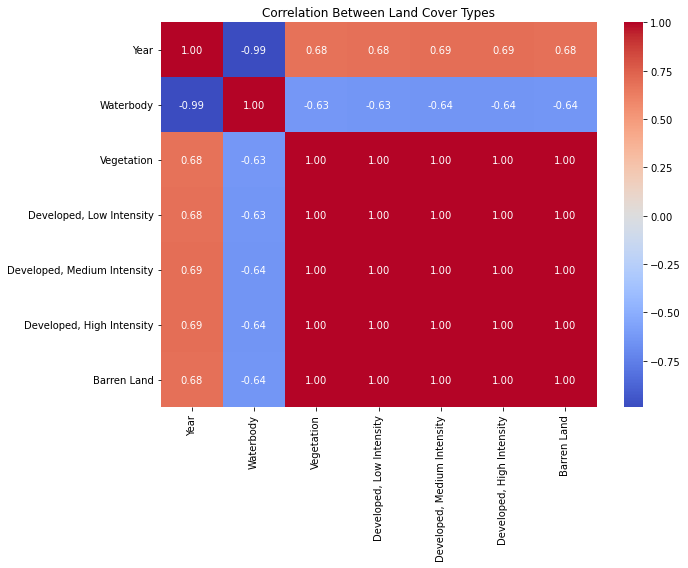

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Land Cover Types')
plt.tight_layout()
plt.show()

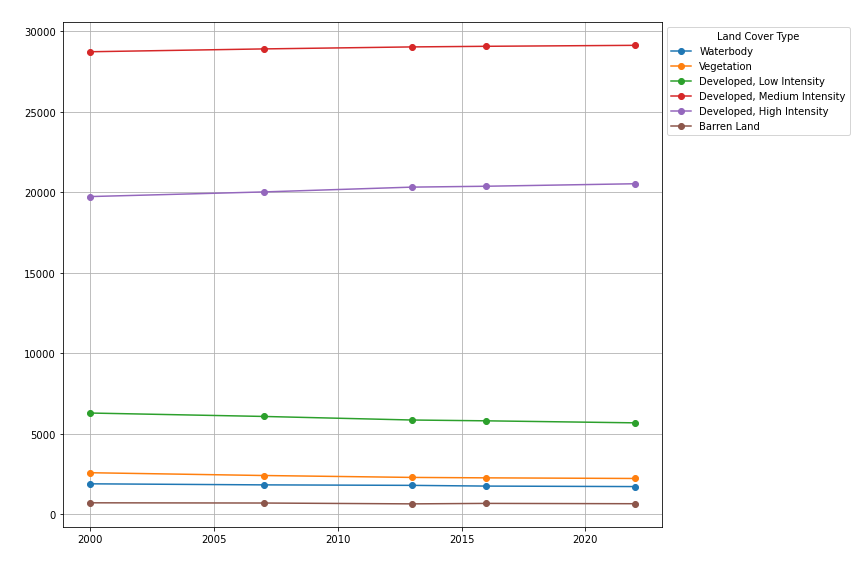

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'D:\Redwan_WMU Thesis\LC_Area_Statistics.xlsx'

# Read the Excel file from sheet 2
df = pd.read_excel(file_path, sheet_name=1)
df.set_index('Year', inplace=True)

# Plotting year-wise comparative graphs for each land cover type
plt.figure(figsize=(12, 8))

for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

# Adjust plot properties for readability against a dark background
plt.title('Year-wise Comparative Analysis of Land Cover Types', color='white')  # Title color adjusted
plt.xlabel('Year', color='white', fontsize=12)  # X-axis label color and size adjusted
plt.ylabel('Area', color='white', fontsize=12)  # Y-axis label color and size adjusted

plt.legend(title='Land Cover Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Set axis label properties
plt.tick_params(axis='x', colors='black', labelsize=10)  # X-axis label properties adjusted
plt.tick_params(axis='y', colors='black', labelsize=10)  # Y-axis label properties adjusted

# Save the plot in the specified directory with higher resolution (dpi) and a black background
save_path = r'D:\Redwan_WMU Thesis\Yearwise_Comparative_Analysis_Land_Cover.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')  
plt.show()


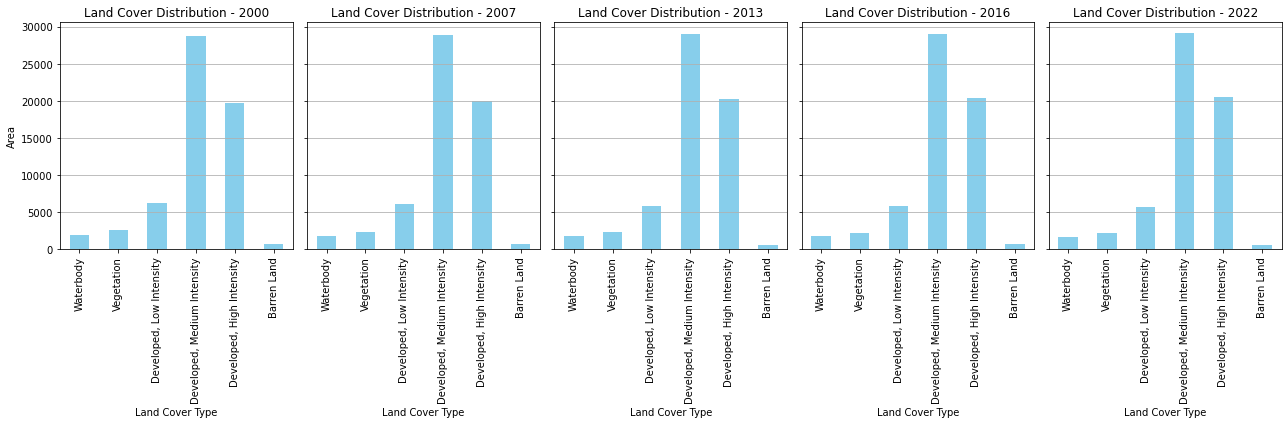

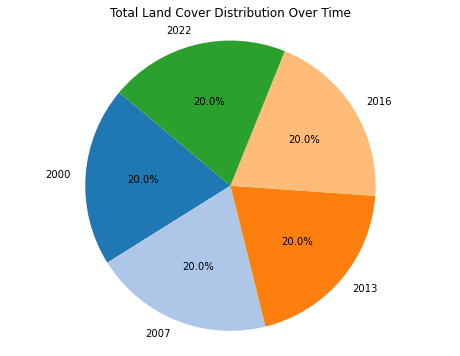

In [22]:
file_path = r'D:\Redwan_WMU Thesis\LC_Area_Statistics.xlsx'

# Read the Excel file from sheet 2
df = pd.read_excel(file_path, sheet_name=1)

# Set the 'Year' column as the index for easier plotting
df.set_index('Year', inplace=True)

# Calculate the total area for each year
df['Total'] = df.sum(axis=1)

# Create subplots for each year to represent land cover distribution
fig, axes = plt.subplots(nrows=1, ncols=len(df), figsize=(18, 6), sharey=True)

for i, year in enumerate(df.index):
    df.loc[year].drop('Total').plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Land Cover Distribution - {year}')
    axes[i].set_xlabel('Land Cover Type')
    axes[i].set_ylabel('Area')
    axes[i].grid(axis='y')

plt.tight_layout()

# Create a pie chart to represent the total land cover for each year
plt.figure(figsize=(8, 6))
plt.pie(df['Total'], labels=df.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Total Land Cover Distribution Over Time')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


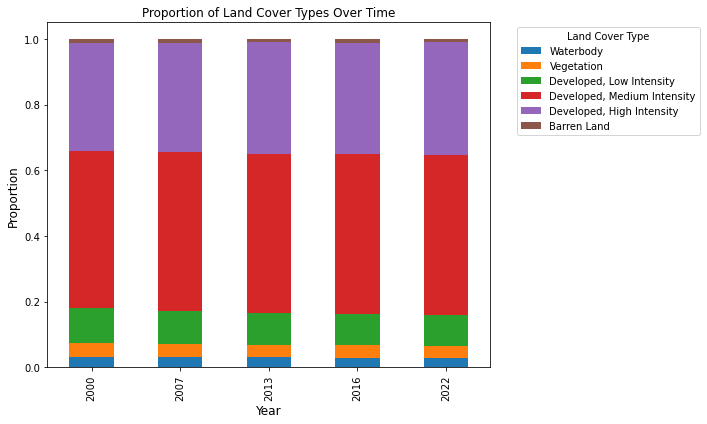

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file from sheet 2
file_path = r'D:\Redwan_WMU Thesis\LC_Area_Statistics.xlsx'
df = pd.read_excel(file_path, sheet_name=1)

# Set the 'Year' column as the index for easier plotting
df.set_index('Year', inplace=True)

# Calculate the total area for each year
df['Total'] = df.sum(axis=1)

# Normalized Stacked Bar Chart for the proportion of land cover types in each year
normalized_df = df.drop('Total', axis=1).div(df['Total'], axis=0)
normalized_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adjust plot properties for readability against a dark background
plt.title('Proportion of Land Cover Types Over Time', color='black')  # Title color adjusted
plt.xlabel('Year', color='black', fontsize=12)  # X-axis label color and size adjusted
plt.ylabel('Proportion', color='black', fontsize=12)  # Y-axis label color and size adjusted

# Adjust legend position to be outside the plot
plt.legend(title='Land Cover Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig(r'D:\Redwan_WMU Thesis\Proportion_Land_Cover.png', dpi=300, bbox_inches='tight', facecolor='white')  # Save with higher resolution and black background
plt.show()


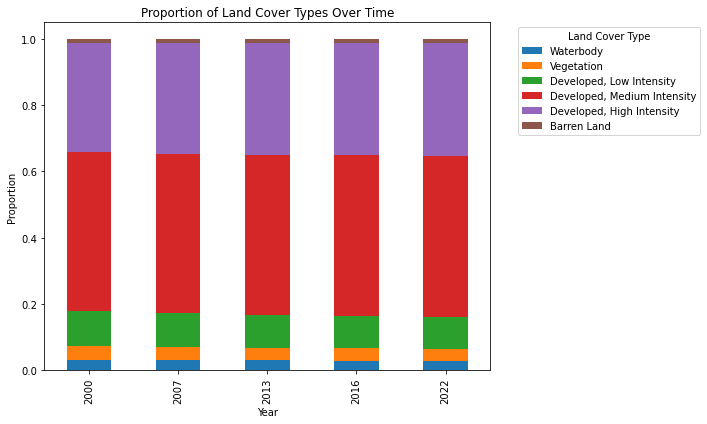

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file from sheet 2
file_path = r'D:\Redwan_WMU Thesis\LC_Area_Statistics.xlsx'
df = pd.read_excel(file_path, sheet_name=1)

# Set the 'Year' column as the index for easier plotting
df.set_index('Year', inplace=True)

# Calculate the total area for each year
df['Total'] = df.sum(axis=1)

# Normalized Stacked Bar Chart for the proportion of land cover types in each year
normalized_df = df.drop('Total', axis=1).div(df['Total'], axis=0)
normalized_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Land Cover Types Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion')

# Adjust legend position to be outside the plot
plt.legend(title='Land Cover Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


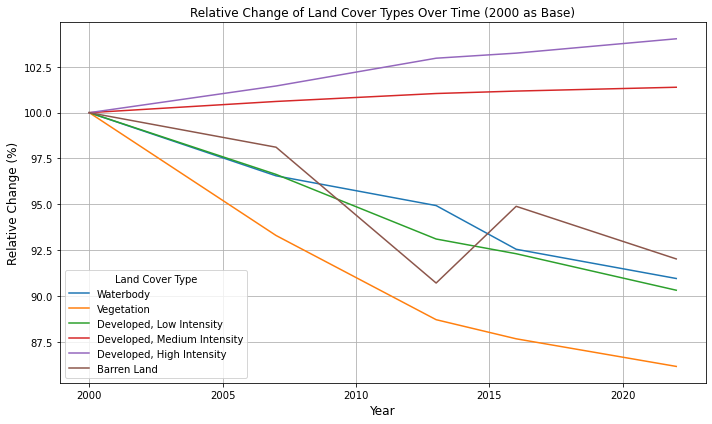

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'D:\Redwan_WMU Thesis\LC_Area_Statistics.xlsx'

# Read the Excel file from sheet 2
df = pd.read_excel(file_path, sheet_name=1)

# Set the 'Year' column as the index for easier plotting
df.set_index('Year', inplace=True)

# Calculate the total area for each year
df['Total'] = df.sum(axis=1)
# Calculate the relative change of each land cover type compared to the year 2000
relative_change = df.drop('Total', axis=1).apply(lambda x: (x / df.iloc[0][x.name]) * 100)

# Plotting relative change of land cover types over time with custom style for readability
fig, ax = plt.subplots(figsize=(10, 6))
relative_change.plot(kind='line', ax=ax)
plt.title('Relative Change of Land Cover Types Over Time (2000 as Base)', color='black')  # Title color adjusted
plt.xlabel('Year', color='black', fontsize=12)  # X-axis label color and size adjusted
plt.ylabel('Relative Change (%)', color='black', fontsize=12)  # Y-axis label color and size adjusted
plt.legend(title='Land Cover Type')
plt.grid(True)
plt.tight_layout()

# Save the plot in the specified directory with higher resolution (dpi)
save_path = r'D:\Redwan_WMU Thesis\Relative_Change_Land_Cover.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')  # Adjust facecolor for the background
plt.show()


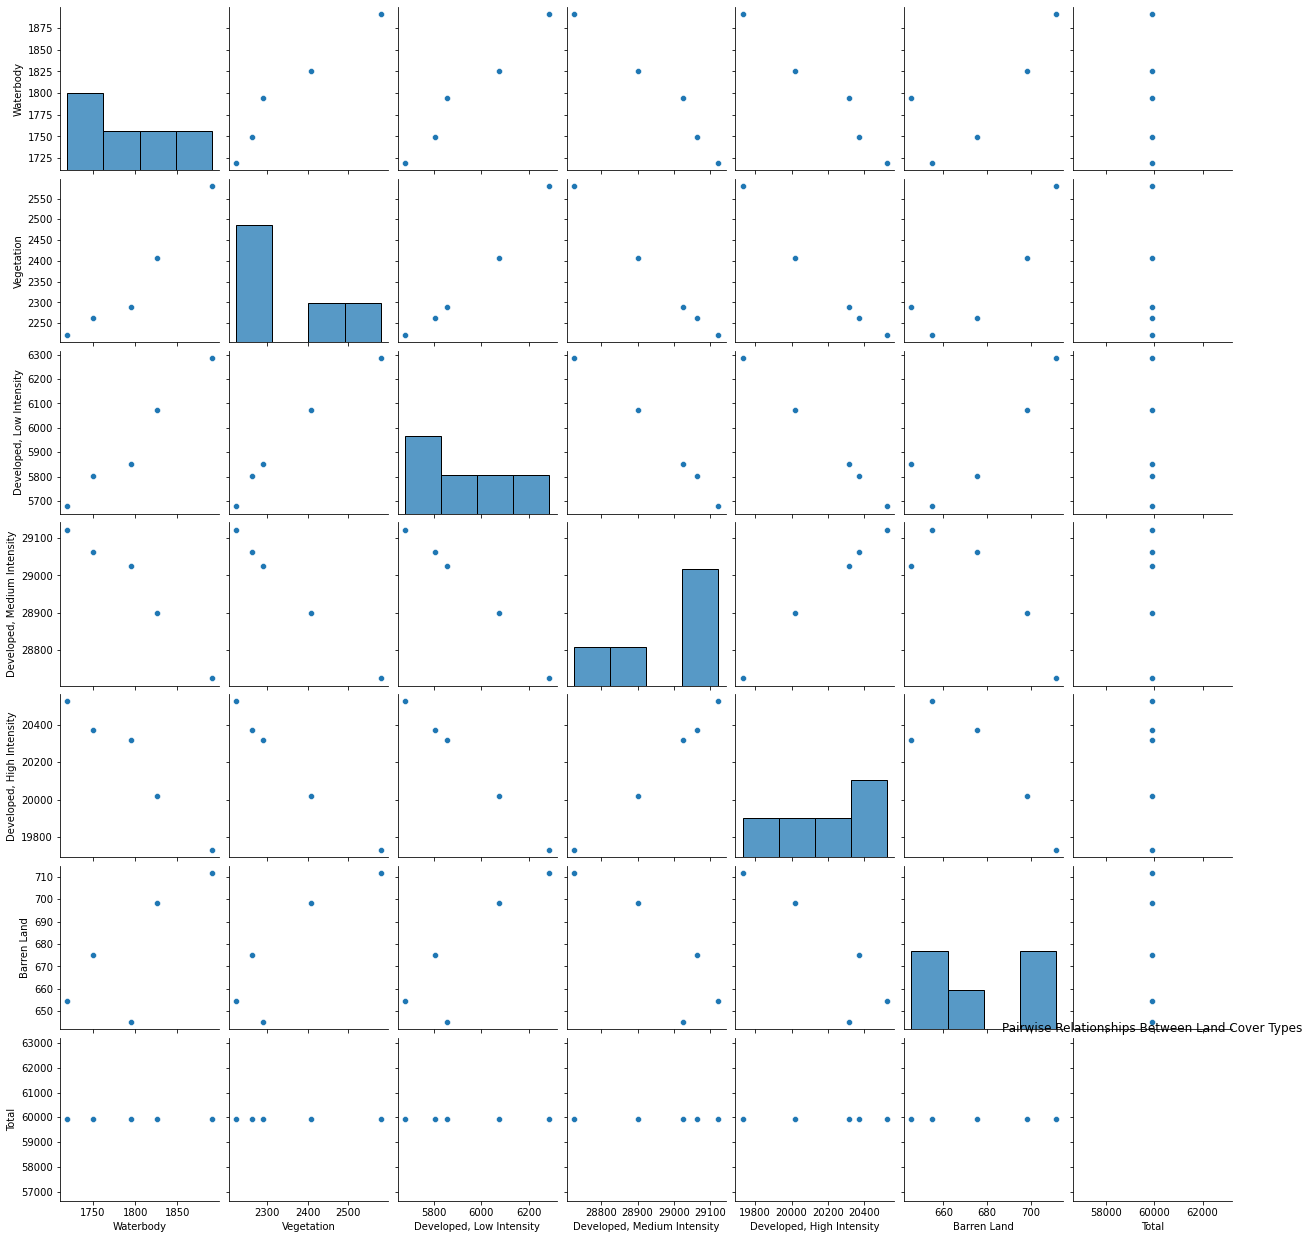

In [42]:
# Pairplot to visualize pairwise relationships between land cover types
sns.pairplot(df, kind='scatter')
plt.title('Pairwise Relationships Between Land Cover Types')
plt.show()


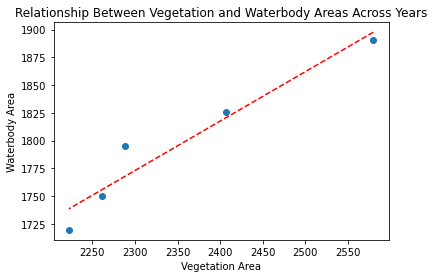

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Define the land cover types for comparison
land_cover_type1 = 'Vegetation'
land_cover_type2 = 'Waterbody'

# Scatter plot to visualize the relationship between the two land cover types' areas across years
plt.scatter(df[land_cover_type1], df[land_cover_type2])
plt.title(f'Relationship Between {land_cover_type1} and {land_cover_type2} Areas Across Years')
plt.xlabel(land_cover_type1 + ' Area')
plt.ylabel(land_cover_type2 + ' Area')

# Calculate the trendline (best-fit line)
z = np.polyfit(df[land_cover_type1], df[land_cover_type2], 1)
p = np.poly1d(z)
plt.plot(df[land_cover_type1], p(df[land_cover_type1]), "r--")  # Plotting the trendline

plt.show()


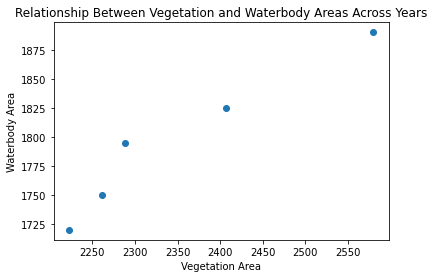

<Figure size 576x432 with 0 Axes>

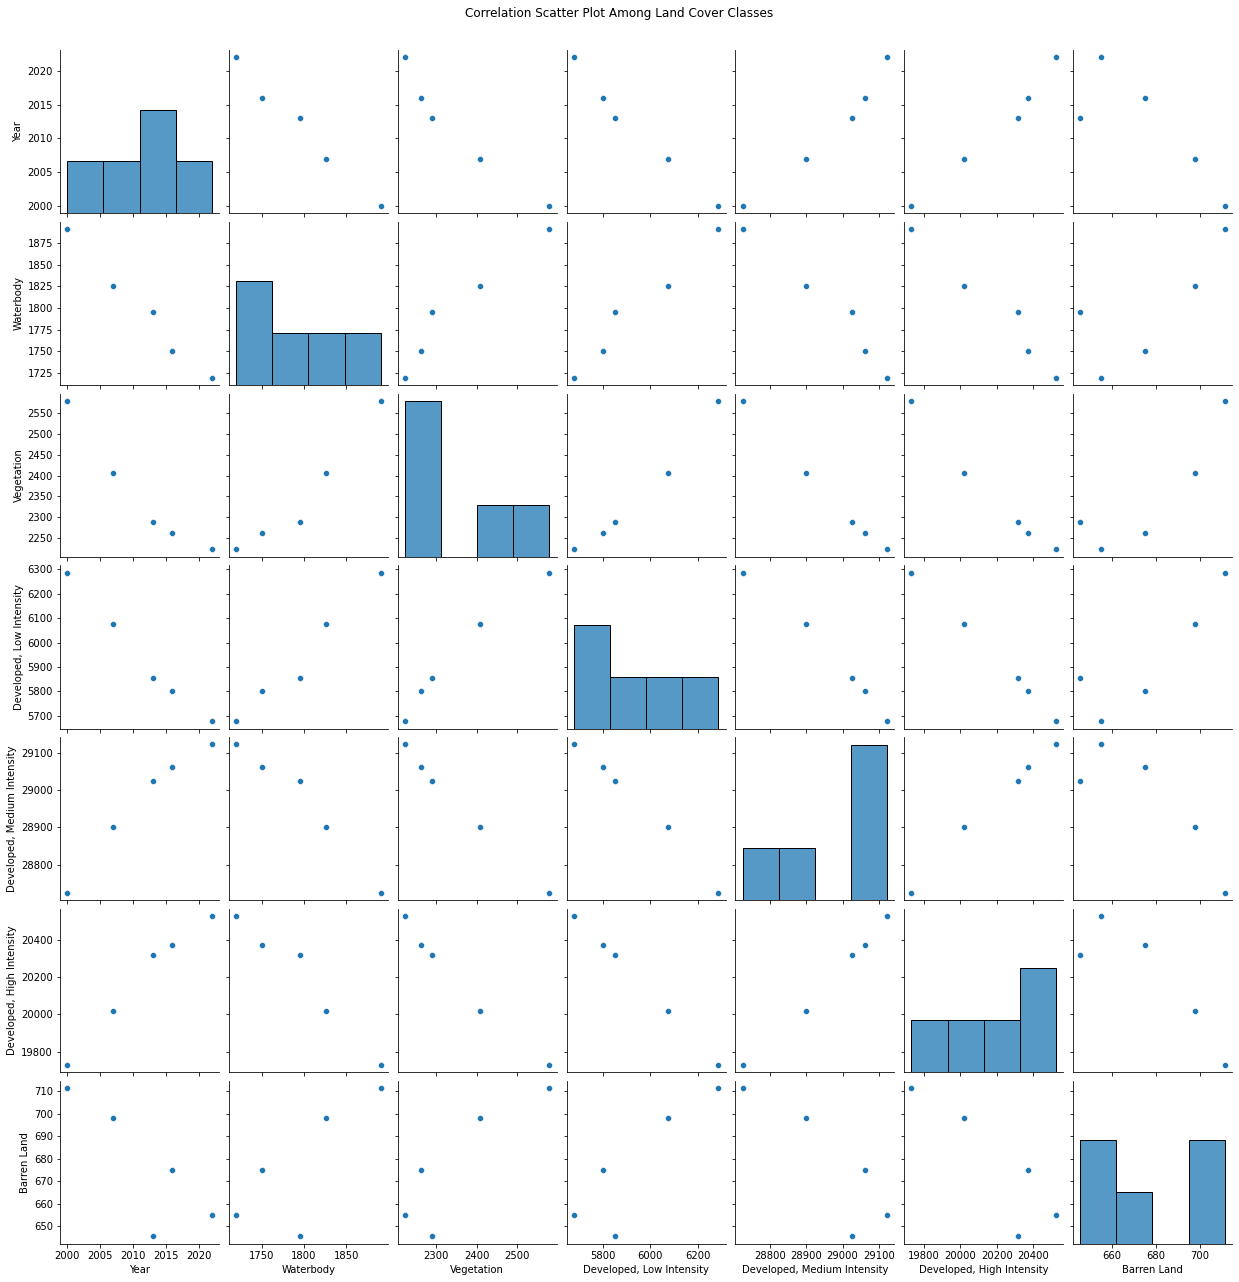

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'D:\Redwan_WMU Thesis\LC_Area_Statistics.xlsx'

# Read the Excel file from sheet 2
df = pd.read_excel(file_path, sheet_name=1)

# Scatter plot to visualize the relationship between two land cover types' areas across years
land_cover_type1 = 'Vegetation'  # Replace with the first land cover type
land_cover_type2 = 'Waterbody'   # Replace with the second land cover type
plt.scatter(df[land_cover_type1], df[land_cover_type2])
plt.title(f'Relationship Between {land_cover_type1} and {land_cover_type2} Areas Across Years')
plt.xlabel(land_cover_type1 + ' Area')
plt.ylabel(land_cover_type2 + ' Area')
plt.show()

# Correlation scatter plot among different land cover classes
plt.figure(figsize=(8, 6))
sns.pairplot(df, kind='scatter')
plt.suptitle('Correlation Scatter Plot Among Land Cover Classes', y=1.02)
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r'D:\Redwan_WMU Thesis\LC_Area_Statistics.xlsx'

# Read the Excel file from sheet 2
df = pd.read_excel(file_path, sheet_name=3)
# Display the first few rows of the dataset
print(df.head())

# Get summary statistics
print(df.describe())

# Check data types and missing values
print(df.info())

   Year  Waterbody  Vegetation  Developed, Low Intensity  \
0  2000  30.274343   32.097272                 32.769179   
1  2007  33.515950   35.490346                 36.761449   
2  2013  28.047828   29.567697                 30.381098   
3  2016  26.181496   27.514622                 28.778497   
4  2022  33.455056   36.238360                 38.189755   

   Developed, Medium Intensity  Developed, High Intensity  Barren Land  
0                    34.008877                  34.510208    32.850580  
1                    38.726978                  39.281837    36.024764  
2                    31.108664                  31.019282    30.179231  
3                    29.980525                  30.045964    28.157564  
4                    39.840722                  40.031180    37.615583  
              Year  Waterbody  Vegetation  Developed, Low Intensity  \
count     5.000000   5.000000    5.000000                  5.000000   
mean   2011.600000  30.294935   32.181659                 3

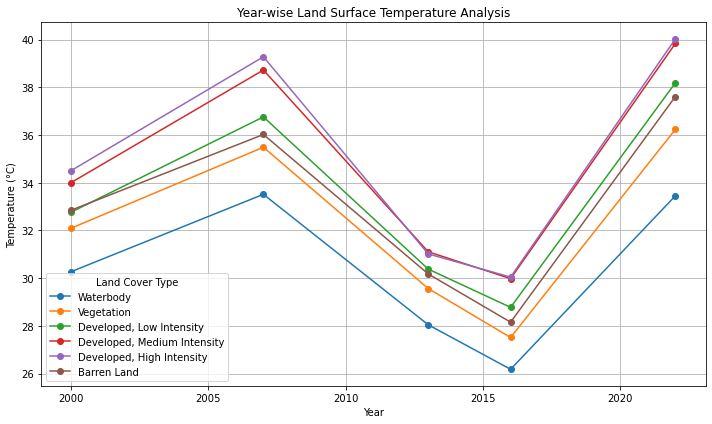

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'D:\Redwan_WMU Thesis\LC_Area_Statistics.xlsx'

# Read the Excel file from sheet 3
df = pd.read_excel(file_path, sheet_name=3)
df.set_index('Year', inplace=True)

# Plotting year-wise land surface temperature analysis for different land cover classes
plt.figure(figsize=(10, 6))

for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.title('Year-wise Land Surface Temperature Analysis')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend(title='Land Cover Type')
plt.grid(True)
plt.tight_layout()
plt.show()




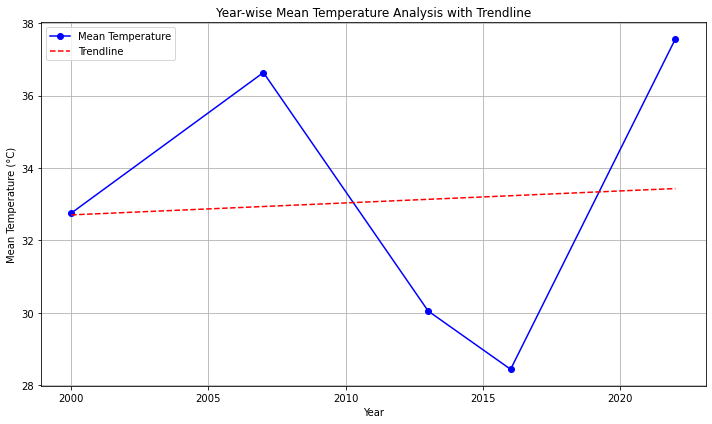

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = r'D:\Redwan_WMU Thesis\LC_Area_Statistics.xlsx'

# Read the Excel file from sheet 3
df = pd.read_excel(file_path, sheet_name=3)
df.set_index('Year', inplace=True)

# Plotting year-wise mean temperature analysis with trendline
plt.figure(figsize=(10, 6))

# Plotting mean temperature for each year
plt.plot(df.index, df['Mean'], marker='o', label='Mean Temperature', color='blue')

# Fit a linear trendline (1st-degree polynomial) using NumPy's polyfit
z = np.polyfit(df.index, df['Mean'], 1)
p = np.poly1d(z)
plt.plot(df.index, p(df.index), color='red', linestyle='--', label='Trendline')

plt.title('Year-wise Mean Temperature Analysis with Trendline')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot in the specified directory with proper legends and markings
save_path = r'D:\Redwan_WMU Thesis\Yearwise_Mean_Temperature_Trendline.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')  
plt.show()


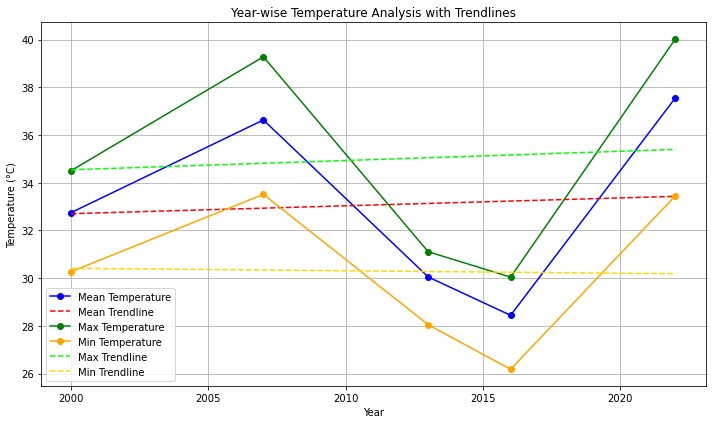

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = r'D:\Redwan_WMU Thesis\LC_Area_Statistics.xlsx'

# Read the Excel file from sheet 3
df = pd.read_excel(file_path, sheet_name=3)
df.set_index('Year', inplace=True)

# Plotting year-wise temperature analysis (mean, max, min) with trendlines
plt.figure(figsize=(10, 6))

# Plot mean temperature for each year
plt.plot(df.index, df['Mean'], marker='o', label='Mean Temperature', color='blue')

# Fit a linear trendline (1st-degree polynomial) for mean temperature
mean_trend = np.polyfit(df.index, df['Mean'], 1)
mean_poly = np.poly1d(mean_trend)
plt.plot(df.index, mean_poly(df.index), color='red', linestyle='--', label='Mean Trendline')

# Plot max and min temperatures
plt.plot(df.index, df['Max'], marker='o', label='Max Temperature', color='green')
plt.plot(df.index, df['Min'], marker='o', label='Min Temperature', color='orange')

# Fit linear trendlines for max and min temperatures
max_trend = np.polyfit(df.index, df['Max'], 1)
max_poly = np.poly1d(max_trend)
plt.plot(df.index, max_poly(df.index), color='lime', linestyle='--', label='Max Trendline')

min_trend = np.polyfit(df.index, df['Min'], 1)
min_poly = np.poly1d(min_trend)
plt.plot(df.index, min_poly(df.index), color='gold', linestyle='--', label='Min Trendline')

plt.title('Year-wise Temperature Analysis with Trendlines')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot in the specified directory
save_path = r'D:\Redwan_WMU Thesis\Yearwise_Temperature_Analysis_Trendlines.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='black')  
plt.show()


In [20]:
import pandas as pd

file_path = r'D:\Redwan_WMU Thesis\LC_Area_Statistics.xlsx'

# Read the Excel file from sheet 3
df = pd.read_excel(file_path, sheet_name=3)
df.set_index('Year', inplace=True)

# Define temperature ranges and corresponding categories
temperature_ranges = [
    {'category': 'Low', 'range': (20, 25)},
    {'category': 'Moderate', 'range': (25, 30)},
    {'category': 'High', 'range': (30, 35)},
    {'category': 'Very High', 'range': (35, 40)},
    # Add more ranges/categories as needed
]

# Function to classify temperature into categories
def classify_temperature(temp):
    for item in temperature_ranges:
        if item['range'][0] <= temp < item['range'][1]:
            return item['category']
    return 'Extreme'  # If temperature doesn't fall into defined ranges, classify as 'Extreme'

# Apply classification function to 'Mean' temperature column to create a new column 'Temperature_Category'
df['Temperature_Category'] = df['Mean'].apply(classify_temperature)

# Display the DataFrame with added temperature categories
print(df)


      Waterbody  Vegetation  Developed, Low Intensity  \
Year                                                    
2000  30.274343   32.097272                 32.769179   
2007  33.515950   35.490346                 36.761449   
2013  28.047828   29.567697                 30.381098   
2016  26.181496   27.514622                 28.778497   
2022  33.455056   36.238360                 38.189755   

      Developed, Medium Intensity  Developed, High Intensity  Barren Land  \
Year                                                                        
2000                    34.008877                  34.510208    32.850580   
2007                    38.726978                  39.281837    36.024764   
2013                    31.108664                  31.019282    30.179231   
2016                    29.980525                  30.045964    28.157564   
2022                    39.840722                  40.031180    37.615583   

           Mean        Max        Min Temperature_Category  

In [23]:
import pandas as pd

file_path = r'D:\Redwan_WMU Thesis\LC_Area_Statistics.xlsx'

# Read the Excel file from sheet 3
df = pd.read_excel(file_path, sheet_name=3)
df.set_index('Year', inplace=True)

# Define temperature ranges and corresponding categories
temperature_ranges = [
    {'category': 'Low', 'range': (20, 25)},
    {'category': 'Moderate', 'range': (25, 30)},
    {'category': 'High', 'range': (30, 35)},
    {'category': 'Very High', 'range': (35, 40)},
    # Add more ranges/categories as needed
]

# Function to classify temperature into categories
def classify_temperature(temp):
    for item in temperature_ranges:
        if item['range'][0] <= temp < item['range'][1]:
            return item['category']
    return 'Extreme'  # If temperature doesn't fall into defined ranges, classify as 'Extreme'

# Apply classification function to 'Mean' temperature column to create a new column 'Temperature_Category'
df['Temperature_Category'] = df['Mean'].apply(classify_temperature)

# Save the DataFrame to an Excel file
output_file_path = r'D:\Redwan_WMU Thesis\Temperature_Classification.xlsx'
df.to_excel(output_file_path, sheet_name='Temperature_Classification', index=True)


In [25]:
# Example DataFrame df with Temperature_Category column
# Replace this with your actual DataFrame

# Assuming 'Temperature_Category' column is already present in the DataFrame df
# If not, use the previously shown method to add the 'Temperature_Category' column to your DataFrame

# Grouping the DataFrame by 'Temperature_Category' and summing the areas for each category
area_by_temperature = df.groupby('Temperature_Category').sum().drop(['Mean', 'Max', 'Min'], axis=1)

# Display the total area for each temperature range category
print(area_by_temperature)


                      Waterbody  Vegetation  Developed, Low Intensity  \
Temperature_Category                                                    
High                  58.322171   61.664969                 63.150277   
Moderate              26.181496   27.514622                 28.778497   
Very High             66.971006   71.728706                 74.951204   

                      Developed, Medium Intensity  Developed, High Intensity  \
Temperature_Category                                                           
High                                    65.117541                  65.529490   
Moderate                                29.980525                  30.045964   
Very High                               78.567700                  79.313017   

                      Barren Land  
Temperature_Category               
High                    63.029811  
Moderate                28.157564  
Very High               73.640347  


                      Waterbody                       Vegetation             \
Temperature_Category       High   Moderate  Very High       High   Moderate   
Year                                                                          
2000                  30.274343        NaN        NaN  32.097272        NaN   
2007                        NaN        NaN  33.515950        NaN        NaN   
2013                  28.047828        NaN        NaN  29.567697        NaN   
2016                        NaN  26.181496        NaN        NaN  27.514622   
2022                        NaN        NaN  33.455056        NaN        NaN   

                                Developed, Low Intensity             \
Temperature_Category  Very High                     High   Moderate   
Year                                                                  
2000                        NaN                32.769179        NaN   
2007                  35.490346                      NaN        NaN   
2013        

<Figure size 720x432 with 0 Axes>

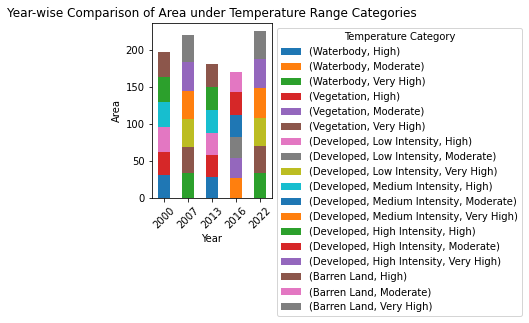

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame df with Temperature_Category column
# Replace this with your actual DataFrame

# Assuming 'Temperature_Category' column is already present in the DataFrame df
# If not, use the previously shown method to add the 'Temperature_Category' column to your DataFrame

# Grouping the DataFrame by both 'Year' and 'Temperature_Category' and summing the areas for each combination
area_by_year_temperature = df.groupby(['Year', 'Temperature_Category']).sum().drop(['Mean', 'Max', 'Min'], axis=1)

# Unstacking the grouped data to pivot the 'Temperature_Category' index to columns for better visibility
area_by_year_temperature = area_by_year_temperature.unstack()

# Display the year-wise comparison data table
print(area_by_year_temperature)

# Visualization - Creating a stacked bar plot for year-wise comparison
plt.figure(figsize=(10, 6))
area_by_year_temperature.plot(kind='bar', stacked=True)
plt.title('Year-wise Comparison of Area under Temperature Range Categories')
plt.xlabel('Year')
plt.ylabel('Area')
plt.legend(title='Temperature Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


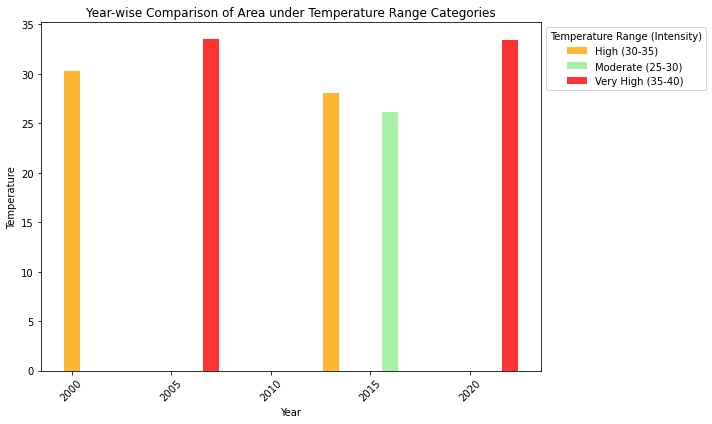

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame df with temperature data
# Replace this with your actual DataFrame

# Assuming the DataFrame 'df' contains temperature data columns such as 'Year', 'Mean', 'Max', 'Min', etc.

# Define temperature ranges and corresponding categories with intensity
temperature_ranges = [
    {'category': 'Low (20-25)', 'range': (20, 25)},
    {'category': 'Moderate (25-30)', 'range': (25, 30)},
    {'category': 'High (30-35)', 'range': (30, 35)},
    {'category': 'Very High (35-40)', 'range': (35, 40)},
    # Add more ranges/categories as needed
]

# Function to classify temperature into categories based on the defined ranges
def classify_temperature(temp):
    for item in temperature_ranges:
        if item['range'][0] <= temp < item['range'][1]:
            return item['category']
    return 'Extreme'  # If temperature doesn't fall into defined ranges, classify as 'Extreme'

# Apply classification function to 'Mean' temperature column to create a new column 'Temperature_Category'
df['Temperature_Category'] = df['Mean'].apply(classify_temperature)

# Grouping the DataFrame by both 'Year' and 'Temperature_Category' and summing the areas for each combination
area_by_year_temperature = df.groupby(['Year', 'Temperature_Category']).sum().drop(['Mean', 'Max', 'Min'], axis=1)
area_by_year_temperature = area_by_year_temperature.unstack()

# Visualization - Creating a stacked bar plot for year-wise comparison with temperature categories including intensity
plt.figure(figsize=(10, 6))

# Define colors for each temperature category
colors = ['orange', 'lightgreen','red', 'salmon']

for i, category in enumerate(area_by_year_temperature.columns.get_level_values(1).unique()):
    plt.bar(area_by_year_temperature.index, area_by_year_temperature['Waterbody', category],
            bottom=area_by_year_temperature.iloc[:, :i].sum(axis=1),
            label=category, color=colors[i], alpha=0.8)

plt.title('Year-wise Comparison of Area under Temperature Range Categories')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(title='Temperature Range (Intensity)', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file
save_path = r'D:\Redwan_WMU Thesis\Temperature_Area_Comparison.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')  # Save the plot as a PNG file with higher resolution
plt.show()
